In [39]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers

In [40]:
ph_coal_outlet = pd.read_csv("ph coal outlet.csv")

In [41]:
ph_coal_outlet.head(11)

,Unnamed: 0,LOGO,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 11.1,Unnamed: 12,Unnamed: 13,Unnamed: 14.1,Unnamed: 12.1,Unnamed: 13.1,Unnamed: 14.2,Unnamed: 9.2,Unnamed: 5.2,Unnamed: 12.2
0,7,TAG,A_431FM1_F1,B_431FM2_F1,C_431BE1_JT,D_441CN1A_1B_TT01,E_451PC1_TT01,H_461KL1_PYRO_MTR,I_Kiln RPM,J_461KL1_IZ,...,K_441CN4_TT01,L_441CN4_TT02,M_441CN5_TT01,N_441CN5_TT02,L_451PC1_PT01,M_451PC1_PT03,N_461KL1_PT01,I_421FN1_SZ,E_481FM1_FI,L_441FN1_SZ
1,8,TAG DES,Kiln Feed,Kiln Feed,Kiln Feed BE KW,PH O/L TEMP.,Calciner Outlet Temp (TC)',BURNING ZONE TEMP,Kiln rpm,Kiln current,...,Cyn-4 Gas Temp,Cyn-4 Meterial Temp,Cyn-5 Gas Temp,Cylone -5 Metrial Temp (TC)',Calciner Outlet Pressure,Calciner Intlet Pressure,Kiln Inlet Pressure,BAG HOUSE FAN RPM,PC COAL TPH,PH Fan speed
2,9,UNIT,tph,tph,Kw,°C,°C,°C,rpm,A,...,°C,°C,°C,°C,mmWc,mmWc,mmWc,rpm,tph,rpm
3,10,06/01/2019 00:00:00,0.0,299.4,102.0,354.4,962.2,1135.5,5.0,388.0,...,782.5,806.1,916.7,1028.3,-154.2,-42.4,-42.6,462.2,10.6,778.4
4,11,06/01/2019 01:00:00,0.0,300.1,101.7,353.5,954.7,1141.8,5.0,399.5,...,766.9,805.0,898.7,1019.9,-154.1,-39.1,-48.0,469.6,10.6,778.3
5,12,06/01/2019 02:00:00,0.0,299.6,101.8,351.7,958.6,1134.9,5.0,400.5,...,767.1,798.8,899.7,1013.5,-153.7,-37.3,-46.6,464.4,10.6,771.7
6,13,06/01/2019 03:00:00,0.0,300.0,101.7,349.0,951.4,1123.4,5.0,398.7,...,768.0,796.1,899.0,1005.7,-156.2,-42.3,-44.4,481.9,10.6,768.2
7,14,06/01/2019 04:00:00,0.0,299.7,101.3,348.4,950.5,1111.8,5.0,393.2,...,755.2,797.6,888.6,1003.5,-152.0,-34.0,-39.3,566.8,10.6,768.4
8,15,06/01/2019 05:00:00,0.0,299.7,101.9,347.7,952.3,1092.4,5.0,391.6,...,752.5,799.6,883.3,1016.6,-162.0,-38.5,-50.6,472.8,10.5,768.4
9,16,06/01/2019 06:00:00,0.0,268.9,95.0,356.6,972.7,1018.6,4.2,407.6,...,760.7,791.8,891.6,1019.0,-100.3,-38.8,-33.3,453.7,9.6,744.1


In [42]:
ph_coal_outlet = ph_coal_outlet.drop([0,1,2])
ph_coal_outlet = ph_coal_outlet.iloc[:,2:]
ph_coal_outlet.head(1407)

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 14,...,Unnamed: 11.1,Unnamed: 12,Unnamed: 13,Unnamed: 14.1,Unnamed: 12.1,Unnamed: 13.1,Unnamed: 14.2,Unnamed: 9.2,Unnamed: 5.2,Unnamed: 12.2
3,0.0,299.4,102.0,354.4,962.2,1135.5,5.0,388.0,383.3,283.7,...,782.5,806.1,916.7,1028.3,-154.2,-42.4,-42.6,462.2,10.6,778.4
4,0.0,300.1,101.7,353.5,954.7,1141.8,5.0,399.5,397.7,328.2,...,766.9,805.0,898.7,1019.9,-154.1,-39.1,-48.0,469.6,10.6,778.3
5,0.0,299.6,101.8,351.7,958.6,1134.9,5.0,400.5,394.8,265.0,...,767.1,798.8,899.7,1013.5,-153.7,-37.3,-46.6,464.4,10.6,771.7
6,0.0,300.0,101.7,349.0,951.4,1123.4,5.0,398.7,396.3,299.5,...,768.0,796.1,899.0,1005.7,-156.2,-42.3,-44.4,481.9,10.6,768.2
7,0.0,299.7,101.3,348.4,950.5,1111.8,5.0,393.2,386.7,173.4,...,755.2,797.6,888.6,1003.5,-152.0,-34.0,-39.3,566.8,10.6,768.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,0.0,250.7,91.6,355.2,959.1,1106.0,4.8,397.7,381.5,274.1,...,748.4,762.1,888.2,954.2,-142.2,-24.3,-32.9,431.7,10.1,717.0
1406,0.0,242.0,89.5,356.2,955.9,1113.3,4.8,368.6,340.3,323.8,...,767.4,761.5,892.6,929.4,-127.9,-27.8,-33.8,437.5,9.8,701.4
1407,0.0,233.7,87.6,358.2,940.3,1064.8,4.5,354.8,306.5,302.7,...,767.5,758.8,886.1,922.6,-129.7,-21.6,-33.1,445.9,9.3,692.0
1408,0.0,231.3,86.9,363.3,988.1,1070.4,4.3,360.2,300.9,306.3,...,781.2,772.1,918.5,952.7,-114.1,-27.4,-37.0,423.0,8.7,688.8


In [43]:
ph_coal_outlet = ph_coal_outlet.iloc[:6350,:]
ph_coal_feed = pd.to_numeric(ph_coal_outlet.iloc[:,0])+pd.to_numeric(ph_coal_outlet.iloc[:,1])
for o in range(0,len(ph_coal_outlet)):
    ph_coal_outlet.iloc[o,:] = pd.to_numeric(ph_coal_outlet.iloc[o,:])
ph_coal_outlet.iloc[:,1] = ph_coal_feed
ph_coal_outlet = ph_coal_outlet.iloc[:,1:]
temperature_drop = []
for o in range(len(ph_coal_outlet)):
    if ph_coal_outlet.iloc[o,11]<300 or ph_coal_outlet.iloc[o,11]>420:
        temperature_drop.append(o)
for t in range(len(temperature_drop)):
    temperature_drop[t] = temperature_drop[t]+3
ph_coal_outlet = ph_coal_outlet.drop(temperature_drop)
print(ph_coal_outlet.iloc[:,11])
trainin = ph_coal_outlet.iloc[:5000,:]
trainoutlet = ph_coal_outlet.iloc[:5000,:]
validatein = ph_coal_outlet.iloc[5000:,:]
validateoutlet = ph_coal_outlet.iloc[5000:,:]
trainin = trainin.to_numpy()
trainoutlet = trainoutlet.to_numpy()
validatein = validatein.to_numpy()
validateoutlet = validateoutlet.to_numpy()
print(trainoutlet)
print(trainin)

3       361.9
4         361
5       359.1
6       356.3
7       355.8
        ...  
6348    340.5
6349    338.1
6350    341.9
6351    327.3
6352    334.4
Name: Unnamed: 5.1, Length: 6128, dtype: object
[[299.4 102.0 354.4 ... 462.2 10.6 778.4]
 [300.1 101.7 353.5 ... 469.6 10.6 778.3]
 [299.6 101.8 351.7 ... 464.4 10.6 771.7]
 ...
 [232.6 90.3 331.1 ... 444.7 8.5 692.8]
 [205.1 81.9 338.9 ... 553.8 7.3 710.7]
 [201.4 80.8 351.0 ... 547.1 6.4 738.2]]
[[299.4 102.0 354.4 ... 462.2 10.6 778.4]
 [300.1 101.7 353.5 ... 469.6 10.6 778.3]
 [299.6 101.8 351.7 ... 464.4 10.6 771.7]
 ...
 [232.6 90.3 331.1 ... 444.7 8.5 692.8]
 [205.1 81.9 338.9 ... 553.8 7.3 710.7]
 [201.4 80.8 351.0 ... 547.1 6.4 738.2]]


In [44]:
from tensorflow.keras.layers.experimental.preprocessing import Normalization
normalizetrain_in = Normalization(axis=-1)
normalizetrain_outlet = Normalization(axis=-1)
normalizevalidate_in = Normalization(axis=-1)
normalizevalidate_outlet = Normalization(axis=-1)
trainin = trainin.astype(np.float32)
trainoutlet = trainoutlet.astype(np.float32)
validatein = validatein.astype(np.float32)
validateoutlet = validateoutlet.astype(np.float32)
normalizetrain_in.adapt(trainin)
normalizetrain_outlet.adapt(trainoutlet)
normalizevalidate_in.adapt(validatein)
normalizevalidate_outlet.adapt(validateoutlet)
trainin_normalize = normalizetrain_in(trainin)
trainoutlet_normalize = normalizetrain_outlet(trainoutlet)
validatein_normalize = normalizevalidate_in(validatein)
validateoutlet_normalize = normalizevalidate_outlet(validateoutlet)
print(validatein_normalize)

tf.Tensor(
[[-3.23102    -3.3984196   1.1591902  ...  0.9883349  -1.4986624
   0.25277185]
 [-2.3155386  -2.4188197   1.3293976  ...  0.9883349  -1.1874198
   0.24873993]
 [-2.3586204  -2.4392278   2.0102189  ...  0.1652692  -1.2318832
   0.1308137 ]
 ...
 [ 0.03778569  0.35671115  0.39326373 ...  0.24743135  1.0357403
   0.07638663]
 [ 0.0431712   0.35671115 -0.6185131  ...  0.39734206  0.7689609
   0.13383733]
 [ 0.05932774  0.33630314 -0.3064704  ...  0.7202254   0.6355712
   0.11267135]], shape=(1128, 27), dtype=float32)


In [45]:
layerin = keras.Input(shape=(27,))
x = keras.layers.Dense(20,activation="relu",activity_regularizer=regularizers.l1(0.0008))(layerin)
x = keras.layers.Dense(10,activation="relu",activity_regularizer=regularizers.l1(0.0008))(x)
x = keras.layers.Dense(5,activation="relu",activity_regularizer=regularizers.l1(0.0008))(x)
x = keras.layers.Dense(10,activation="relu",activity_regularizer=regularizers.l1(0.0008))(x)
x = keras.layers.Dense(20,activation="relu",activity_regularizer=regularizers.l1(0.0008))(x)
x = keras.layers.Dense(27)(x)
model = keras.Model(inputs=layerin,outputs=x)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 27)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 20)                560       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_8 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_9 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_10 (Dense)             (None, 27)                567 

In [46]:
model.compile(optimizer="adam",loss="mean_squared_error")
validation_set = tf.data.Dataset.from_tensor_slices((validatein,validateoutlet))
history = model.fit(trainin_normalize,trainoutlet_normalize,batch_size=40,epochs=80,validation_data=(validatein_normalize,validateoutlet_normalize))

Epoch 1/80
125/125 [==============================] - 0s 2ms/step - loss: 0.9430 - val_loss: 0.8833
Epoch 2/80
125/125 [==============================] - 0s 995us/step - loss: 0.7151 - val_loss: 0.6621
Epoch 3/80
125/125 [==============================] - 0s 1ms/step - loss: 0.5527 - val_loss: 0.4945
Epoch 4/80
125/125 [==============================] - 0s 1ms/step - loss: 0.4803 - val_loss: 0.4238
Epoch 5/80
125/125 [==============================] - 0s 1ms/step - loss: 0.4437 - val_loss: 0.3933
Epoch 6/80
125/125 [==============================] - 0s 1ms/step - loss: 0.4234 - val_loss: 0.3798
Epoch 7/80
125/125 [==============================] - 0s 965us/step - loss: 0.4090 - val_loss: 0.3654
Epoch 8/80
125/125 [==============================] - 0s 1ms/step - loss: 0.3982 - val_loss: 0.3575
Epoch 9/80
125/125 [==============================] - 0s 2ms/step - loss: 0.3869 - val_loss: 0.3524
Epoch 10/80
125/125 [==============================] - 0s 1ms/step - loss: 0.3744 - val_loss: 0.

3       361.9
4         361
5       359.1
6       356.3
7       355.8
        ...  
6348    340.5
6349    338.1
6350    341.9
6351    327.3
6352    334.4
Name: Unnamed: 5.1, Length: 6128, dtype: object


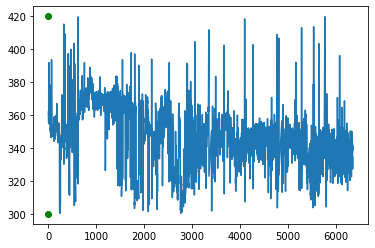

In [47]:
import matplotlib.pyplot as plt
print(ph_coal_outlet.iloc[:,11])
plt.plot(ph_coal_outlet.iloc[:,11])
plt.plot(420,"go")
plt.plot(300,"go")

3       348.1
4       347.6
5       345.6
6       342.9
7       342.3
        ...  
6348    333.5
6349    331.3
6350      334
6351    323.1
6352    326.2
Name: Unnamed: 6, Length: 6128, dtype: object


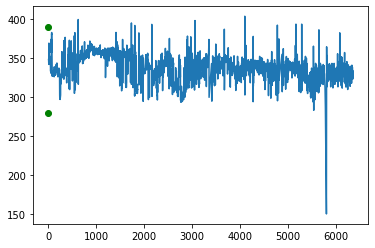

In [48]:
print(ph_coal_outlet.iloc[:,12])
plt.plot(ph_coal_outlet.iloc[:,12])
plt.plot(390,"go")
plt.plot(280,"go")

3       378.7
4       377.7
5       375.6
6       372.3
7       371.8
        ...  
6348    407.9
6349      405
6350    409.8
6351    445.4
6352    442.6
Name: Unnamed: 7, Length: 6128, dtype: object


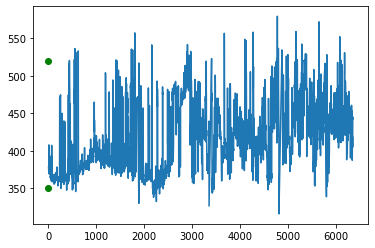

In [49]:
print(ph_coal_outlet.iloc[:,13])
plt.plot(ph_coal_outlet.iloc[:,13])
plt.plot(520,"go")
plt.plot(350,"go")

3       378.9
4       377.9
5       375.8
6       372.9
7       372.3
        ...  
6348    406.6
6349    403.5
6350    408.1
6351    438.7
6352    441.7
Name: Unnamed: 8.1, Length: 6128, dtype: object


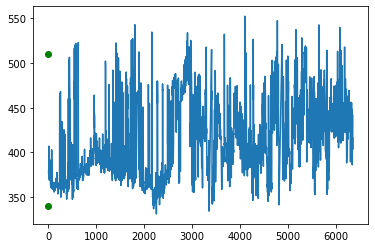

In [50]:
print(ph_coal_outlet.iloc[:,14])
plt.plot(ph_coal_outlet.iloc[:,14])
plt.plot(510,"go")
plt.plot(340,"go")

3       598.1
4       597.4
5       596.1
6       591.9
7       589.2
        ...  
6348    600.5
6349    598.1
6350    603.3
6351      619
6352    622.7
Name: Unnamed: 9.1, Length: 6128, dtype: object


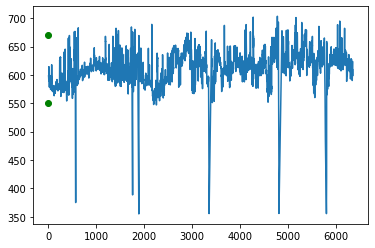

In [51]:
print(ph_coal_outlet.iloc[:,15])
plt.plot(ph_coal_outlet.iloc[:,15])
plt.plot(670,"go")
plt.plot(550,"go")

3       594.8
4       594.6
5       592.8
6       588.4
7       586.7
        ...  
6348    604.6
6349    602.1
6350    607.9
6351    624.4
6352    625.4
Name: Unnamed: 10.1, Length: 6128, dtype: object


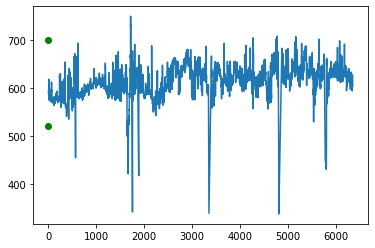

In [52]:
print(ph_coal_outlet.iloc[:,16])
plt.plot(ph_coal_outlet.iloc[:,16])
plt.plot(700,"go")
plt.plot(520,"go")

3       782.5
4       766.9
5       767.1
6         768
7       755.2
        ...  
6348      794
6349    795.7
6350    799.2
6351    793.1
6352    779.3
Name: Unnamed: 11.1, Length: 6128, dtype: object


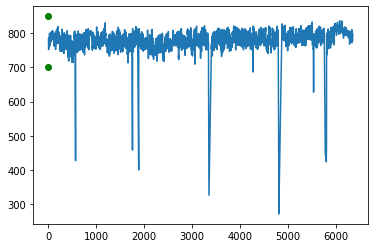

In [53]:
print(ph_coal_outlet.iloc[:,17])
plt.plot(ph_coal_outlet.iloc[:,17])
plt.plot(850,"go")
plt.plot(700,"go")

3       806.1
4         805
5       798.8
6       796.1
7       797.6
        ...  
6348    790.5
6349    789.8
6350    797.3
6351    801.2
6352    797.6
Name: Unnamed: 12, Length: 6128, dtype: object


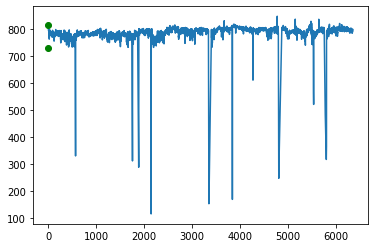

In [54]:
print(ph_coal_outlet.iloc[:,18])
plt.plot(ph_coal_outlet.iloc[:,18])
plt.plot(817,"go")
plt.plot(730,"go")

3       916.7
4       898.7
5       899.7
6         899
7       888.6
        ...  
6348      922
6349    933.3
6350    940.3
6351      932
6352    909.9
Name: Unnamed: 13, Length: 6128, dtype: object


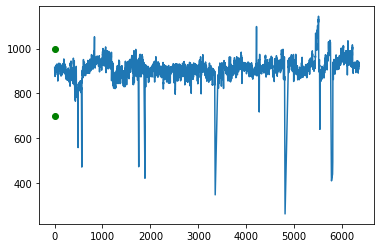

In [55]:
print(ph_coal_outlet.iloc[:,19])
plt.plot(ph_coal_outlet.iloc[:,19])
plt.plot(1000,"go")
plt.plot(700,"go")

3       1028.3
4       1019.9
5       1013.5
6       1005.7
7       1003.5
         ...  
6348    1017.8
6349    1015.3
6350      1023
6351    1039.5
6352      1046
Name: Unnamed: 14.1, Length: 6128, dtype: object


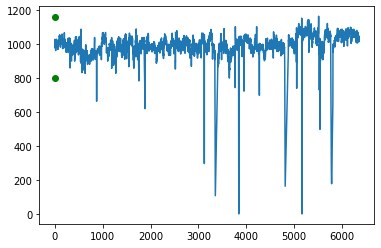

In [56]:
print(ph_coal_outlet.iloc[:,20])
plt.plot(ph_coal_outlet.iloc[:,20])
plt.plot(1160,"go")
plt.plot(800,"go")

3      -154.2
4      -154.1
5      -153.7
6      -156.2
7        -152
        ...  
6348   -119.8
6349   -121.7
6350   -127.1
6351   -126.7
6352     -119
Name: Unnamed: 12.1, Length: 6128, dtype: object


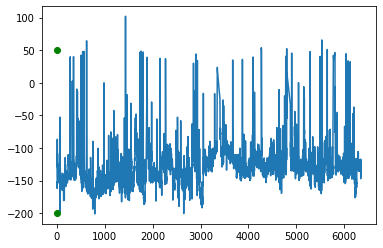

In [57]:
print(ph_coal_outlet.iloc[:,21])
plt.plot(ph_coal_outlet.iloc[:,21])
plt.plot(50,"go")
plt.plot(-200,"go")

3      -42.4
4      -39.1
5      -37.3
6      -42.3
7        -34
        ... 
6348   -33.5
6349   -33.1
6350   -33.6
6351   -34.2
6352   -35.6
Name: Unnamed: 13.1, Length: 6128, dtype: object


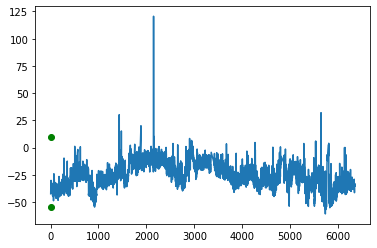

In [58]:
print(ph_coal_outlet.iloc[:,22])
plt.plot(ph_coal_outlet.iloc[:,22])
plt.plot(10,"go")
plt.plot(-55,"go")

3      -42.6
4        -48
5      -46.6
6      -44.4
7      -39.3
        ... 
6348   -23.5
6349   -27.8
6350   -30.6
6351   -29.8
6352   -30.2
Name: Unnamed: 14.2, Length: 6128, dtype: object


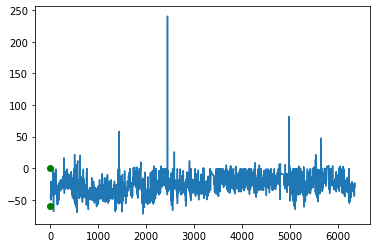

In [59]:
print(ph_coal_outlet.iloc[:,23])
plt.plot(ph_coal_outlet.iloc[:,23])
plt.plot(0,"go")
plt.plot(-60,"go")

3         388
4       399.5
5       400.5
6       398.7
7       393.2
        ...  
6348    367.6
6349    361.3
6350    360.7
6351    380.2
6352    350.2
Name: Unnamed: 10, Length: 6128, dtype: object


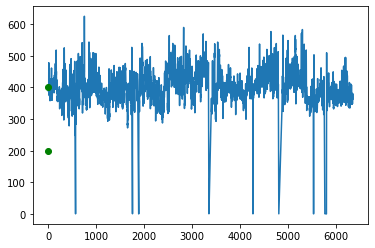

In [60]:
print(ph_coal_outlet.iloc[:,6])
plt.plot(ph_coal_outlet.iloc[:,6])
plt.plot(200,"go")
plt.plot(400,"go")

3       354.4
4       353.5
5       351.7
6         349
7       348.4
        ...  
6348    336.8
6349    334.8
6350    336.8
6351    326.1
6352    329.4
Name: Unnamed: 4, Length: 6128, dtype: object


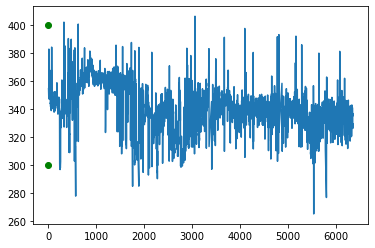

In [76]:
print(ph_coal_outlet.iloc[:,2])
plt.plot(ph_coal_outlet.iloc[:,2])
plt.plot(300,"go")
plt.plot(400,"go")

3       962.2
4       954.7
5       958.6
6       951.4
7       950.5
        ...  
6348    907.1
6349    914.1
6350    929.8
6351    938.7
6352    935.7
Name: Unnamed: 5, Length: 6128, dtype: object


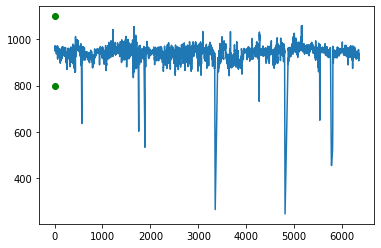

In [62]:
print(ph_coal_outlet.iloc[:,3])
plt.plot(ph_coal_outlet.iloc[:,3])
plt.plot(800,"go")
plt.plot(1100,"go")

3         102
4       101.7
5       101.8
6       101.7
7       101.3
        ...  
6348      103
6349    102.7
6350      103
6351      103
6352    102.9
Name: Unnamed: 3, Length: 6128, dtype: object


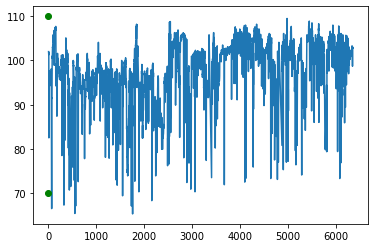

In [87]:
print(ph_coal_outlet.iloc[:,1])
plt.plot(ph_coal_outlet.iloc[:,1])
plt.plot(70,"go")
plt.plot(110,"go")

In [64]:
ph_coal_test = pd.read_csv("ph coal outlet.csv")
ph_coal_test = ph_coal_test.drop([0,1,2])
ph_coal_test = ph_coal_test.iloc[:,2:]
ph_coal_test = ph_coal_test.iloc[:6350,:]
ph_coal_feed_test = pd.to_numeric(ph_coal_test.iloc[:,0])+pd.to_numeric(ph_coal_test.iloc[:,1])
for o in range(0,len(ph_coal_test)):
    ph_coal_test.iloc[o,:] = pd.to_numeric(ph_coal_test.iloc[o,:])
ph_coal_test.iloc[:,1] = ph_coal_feed_test
ph_coal_test = ph_coal_test.iloc[:,1:]
print(ph_coal_test.head(11))

    Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 8 Unnamed: 9  \
3        299.4        102      354.4      962.2     1135.5          5   
4        300.1      101.7      353.5      954.7     1141.8          5   
5        299.6      101.8      351.7      958.6     1134.9          5   
6        300.0      101.7        349      951.4     1123.4          5   
7        299.7      101.3      348.4      950.5     1111.8          5   
8        299.7      101.9      347.7      952.3     1092.4          5   
9        268.9         95      356.6      972.7     1018.6        4.2   
10       226.0       82.5      382.6      972.2     1086.8        3.3   
11       260.6       92.9      363.3      952.6       1169        4.5   
12       261.6       93.4      360.2      952.6     1098.8        4.4   
13       260.6       93.1      362.3      952.5     1119.9        4.1   

   Unnamed: 10 Unnamed: 11 Unnamed: 14 Unnamed: 3.1  ... Unnamed: 11.1  \
3          388       383.3       283.7          3

In [65]:
ph_coal_test = ph_coal_test.sample(frac=0.6)
ph_coal_test = ph_coal_test.to_numpy()

In [66]:
normalizer_test = Normalization(axis=-1)
normalizer_test.adapt(ph_coal_test)
ph_coal_test = ph_coal_test.astype(np.float32)
ph_coal = normalizer_test(ph_coal_test)
print(ph_coal)

tf.Tensor(
[[ 1.1933243   0.8216303   0.6097522  ...  0.9535018   0.9371872
   0.90776545]
 [ 0.5616466  -0.08907506  0.29117048 ...  0.04119627  0.03854416
   0.36104733]
 [ 0.42907256 -0.02008221  0.62863153 ...  0.8825449   0.41297883
   0.5487586 ]
 ...
 [-0.4872494  -0.2132624  -7.409067   ... -5.111641   -3.5560288
  -4.93484   ]
 [ 0.6318336   0.76643586  0.0457447  ... -0.32597864  0.6001961
   0.1112413 ]
 [ 0.2848001  -0.04767998 -0.33655292 ... -0.43522984  0.07598741
   0.24756384]], shape=(3810, 27), dtype=float32)


In [67]:
ph_coal_input = model.predict(ph_coal)
diff = ph_coal_input-ph_coal
loss_model = []
for t in range(0,len(diff)):
    diff_process = 0
    for o in range(27):
        diff_process = diff_process+diff[t,o]
    loss_model.append(diff_process)

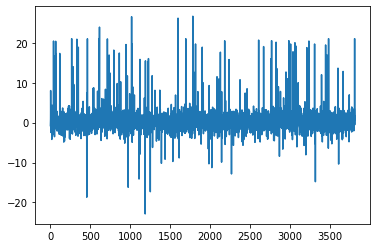

In [68]:
plt.plot(loss_model)

In [69]:
for z in range(0,len(loss_model)):
    if loss_model[z]>5 or loss_model[z]<-5:
        print(ph_coal_test[z,:])

[ 285.3  105.5  135.   330.4 1263.8    0.     0.     0.    11.2  171.
   33.   149.7   83.5  171.7  118.1  188.6  130.3  233.8 -148.2  250.8
    0.    37.9  -10.5    1.9   69.2    0.     0. ]
[ 2.853e+02  1.048e+02  2.070e+01  2.430e+01  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  4.450e+01  2.450e+01  2.500e+01  2.100e+01
  2.010e+01  1.950e+01  1.970e+01  1.880e+01  1.930e+01  2.410e+01
  2.500e+01  2.380e+01  0.000e+00  2.000e-01 -1.050e+01 -1.200e+00
  0.000e+00  0.000e+00  0.000e+00]
[ 1.501e+02  6.540e+01  1.472e+02  2.492e+02  7.500e+02  0.000e+00
  5.000e-01  2.800e+00  7.300e+00  1.682e+02  1.738e+02  1.592e+02
  1.652e+02  1.783e+02  2.005e+02  1.861e+02  2.053e+02  2.136e+02
  1.707e+02  2.260e+02  2.127e+02  2.980e+01 -3.300e+00  2.000e-01
  6.210e+01  0.000e+00  0.000e+00]
[285.6 105.8  17.9  23.1   0.    0.    0.    0.   44.4  22.3  20.1  18.7
  17.3  18.7  18.2  18.5  18.4  23.2  20.4  22.6   0.    1.1  -9.   -1.2
   0.    0.    0. ]
[ 2.514e+02  9.620e+01  8.830e+01  1

In [70]:
for z in range(0,len(loss_model)):
    if loss_model[z]>5 or loss_model[z]<-5:
        print(ph_coal_test[z,0])

285.3
285.3
150.1
285.6
251.4
251.3
251.6
251.1
251.2
282.4
251.2
251.1
251.3
251.3
301.1
151.0
251.5
251.2
300.1
280.4
261.5
265.0
251.5
220.5
285.0
251.4
301.2
251.4
251.1
251.1
251.2
300.9
299.7
251.0
269.8
251.3
251.3
280.5
241.7
151.1
208.1
285.5
150.0
251.3
284.9
150.2
216.9
179.4
278.9
299.8
251.2
285.1
277.0
151.2
253.0
285.3
285.3
215.1
263.5
249.4
150.3
185.2
253.8
251.2
207.9
150.2
284.9
179.8
300.1
270.3
285.1
301.0
273.6
269.6
251.2
249.5
299.9
151.0
251.5
201.3
251.3
285.5
278.4
150.1
251.1
225.9
233.8
240.5
251.1
188.8
253.6
285.4
251.4
150.1
285.5
285.5
251.1
285.2
241.9
180.0
299.7
184.6
284.9
151.1
285.3
285.5
288.9
150.1
283.6
251.4
255.4
251.1
274.9
175.1
184.1
291.6
285.7
299.7
285.2
290.2
248.5
284.9
226.4
285.0
299.9
251.4
169.8
274.8
250.9
251.3
301.2
300.0
301.2
251.5


3       383.3
4       397.7
5       394.8
6       396.3
7       386.7
        ...  
6348    305.9
6349    311.4
6350    315.3
6351    341.2
6352    302.4
Name: Unnamed: 11, Length: 6128, dtype: object


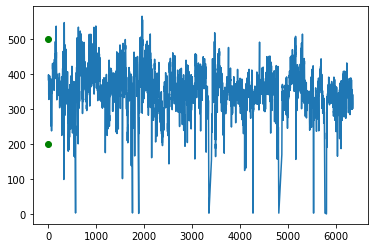

In [91]:
print(ph_coal_outlet.iloc[:,7])
plt.plot(ph_coal_outlet.iloc[:,7])
plt.plot(200,"go")
plt.plot(500,"go")